# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("GGC_MAXPRO")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [6]:
housing_units = sfo_data['housing_units'].groupby('year').mean()
housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

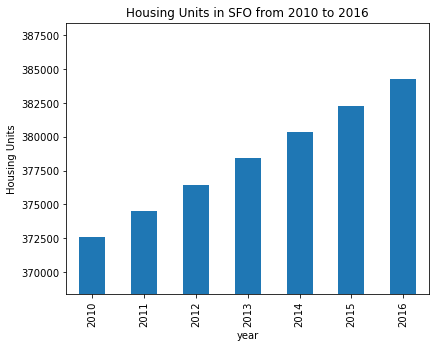

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

plt.xlabel('Years')
plt.ylabel('Housing Units')
plt.title(f'Housing Units in SFO from {housing_units.index[0]} to {housing_units.index[-1]}')
plt.xlim(2010, 2016)
plt.ylim((housing_units.min()-housing_units.std()), (housing_units.max()+housing_units.std()))
housing_units.plot.bar(figsize=(6.5, 5)).get_figure().savefig('./Images/housing_units_bar') # --> save plot into a file as well
#housing_units.plot.bar(figsize=(6.5, 5))  # only on the screen 


- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [8]:

sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [9]:
# Calculate the average gross rent and average sale price per square foot
saleprice_grossrent = sfo_data['sale_price_sqr_foot'].groupby('year').mean(), sfo_data['gross_rent'].groupby('year').mean()
col_names = ["sale_price_sqr_foot", "gross_rent"]
saleprice_grossrent = pd.concat(saleprice_grossrent, axis=1, keys=col_names)
saleprice_grossrent

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


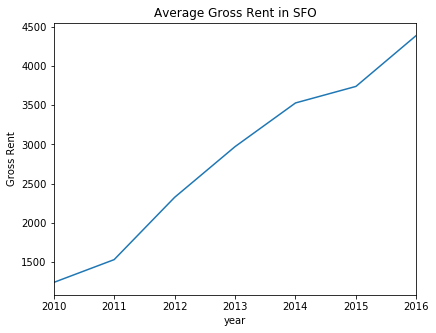

In [10]:
plt.xlabel('Years')
plt.ylabel('Gross Rent')
plt.title(f'Average Gross Rent in SFO')

saleprice_grossrent['gross_rent'].plot.line(figsize=(6.5, 5)).get_figure().savefig('./Images/gross_rent_line') # --> save plot 
#saleprice_grossrent['gross_rent'].plot.line(figsize=(6.5, 5))  # only on the screen 

### Average Sales Price per Year

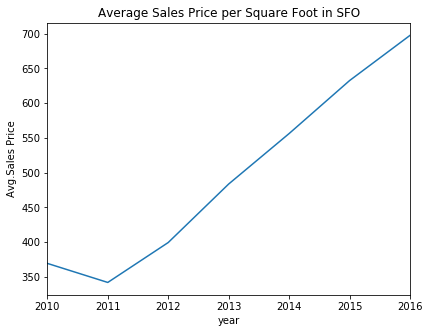

In [11]:
plt.xlabel('Years')
plt.ylabel('Avg.Sales Price')
plt.title(f'Average Sales Price per Square Foot in SFO')

saleprice_grossrent['sale_price_sqr_foot'].plot.line(figsize=(6.5, 5)).get_figure().savefig('./Images/avg_sq_foot_line') # --> save plot 
#saleprice_grossrent['sale_price_sqr_foot'].plot.line(figsize=(6.5, 5))  # only on the screen 

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [ ]:
#### Average Prices By Neighborhood
#In this section, you want to compare the average prices by neighborhood.
#1. Group the data by year and by neighborhood and calculate the average (mean) `sales_price_sqr_foot`.
    # Group by year and neighborhood and then create a new dataframe of the mean values
#2. Visualize the mean `sales_price_sqr_foot` per year with the neighborhood as a dropdown selector. 
    # Hint: Use hvplot to obtain the interactive dropdown selector for the neighborhood.

In [13]:
# 1. Group the data by year and by neighborhood and calculate the average (mean) `sales_price_sqr_foot`.
#.    create a new dataframe of the mean values
avgprice_neighborhood = sfo_data[['neighborhood','sale_price_sqr_foot']].groupby([sfo_data.index, 'neighborhood']).mean().reset_index()
avgprice_neighborhood.head()

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [14]:
#2. Visualize the mean `sales_price_sqr_foot` per year with the neighborhood as a dropdown selector. 
    # Hint: Use hvplot to obtain the interactive dropdown selector for the neighborhood.
    # # The plot should have a dropdown selector for the neighborhood
avgprice_neighborhood.hvplot(kind='line', x='year', y='sale_price_sqr_foot', groupby='neighborhood', dynspread=True, datashade=False).opts(framewise=True)


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [15]:
### Method 2 (selecting only 'neighborhood','sale_price_sqr_foot'       not usefull if we need to use the rest of columns)
# Getting the data from the top 10 expensive neighborhoods 
# create only the two columns we need 

top10 = sfo_data[['neighborhood','sale_price_sqr_foot']].groupby('neighborhood').mean().sort_values(by=['sale_price_sqr_foot'],axis=0,ascending=False).reset_index()
top10 = top10[0:10]
top10


,neighborhood,sale_price_sqr_foot
0,Union Square District,903.993258
1,Merced Heights,788.844818
2,Miraloma Park,779.810842
3,Pacific Heights,689.555817
4,Westwood Park,687.087575
5,Telegraph Hill,676.506578
6,Presidio Heights,675.350212
7,Cow Hollow,665.964042
8,Potrero Hill,662.013613
9,South Beach,650.124479


In [22]:
#####  Method 2 (maintaining all columns)
# Getting the data from the top 10 expensive neighborhoods 

top10 = sfo_data.groupby('neighborhood').mean().sort_values(by=['sale_price_sqr_foot'],axis=0,ascending=False).reset_index()
top10 = top10[0:10]
top10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


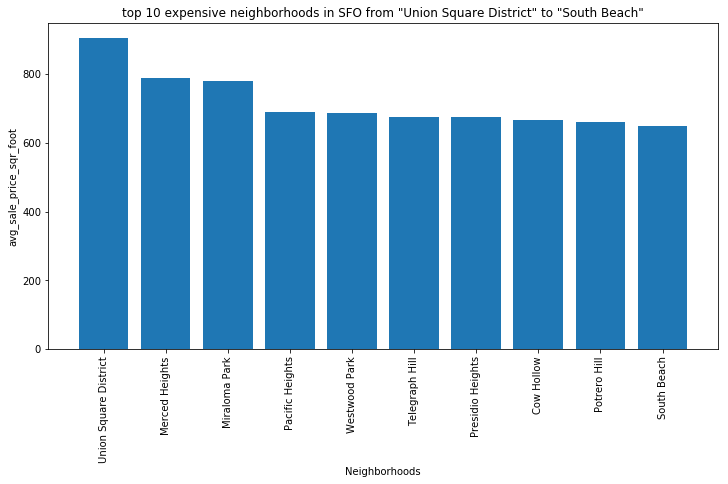

In [23]:
# Plotting the data from the top 10 expensive neighborhoods
#Plot the results as a bar chart.

plt.figure(figsize=(12,6))        #has to be first
plt.xlabel('Neighborhoods')
plt.ylabel('avg_sale_price_sqr_foot')
plt.title(f'top 10 expensive neighborhoods in SFO from "{top10.iloc[0]["neighborhood"]}" to "{top10.iloc[9]["neighborhood"]}"')
plt.xticks(rotation=90)
plt.bar(top10['neighborhood'],top10['sale_price_sqr_foot'])
plt.savefig('./Images/top10.png')         #before show()
plt.show()
plt.close()

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [24]:
px.parallel_coordinates(top10, color='sale_price_sqr_foot')

In [25]:
# Plot data using parallel_categories
px.parallel_categories(
    top10,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Avg.SalePrice SqrFoot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [ ]:

Read in neighborhood location data and build an interactive map with the average prices per neighborhood. 
Use a scatter mapbox object from plotly express to create the visualization. Remember, you will need your mapbox API key for this.

Remember that in order to create maps visualizations using Plotly Express, you will need to create an account at [mapbox](https://www.mapbox.com/) and [create an access token](https://docs.mapbox.com/help/how-mapbox-works/access-tokens/#creating-and-managing-access-tokens).


In [26]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [27]:
#neighborhood_mean = sfo_data.groupby('neighborhood').mean().sort_values(by=['sale_price_sqr_foot'],axis=0,ascending=False).reset_index()
neighborhood_mean = sfo_data.groupby('neighborhood').mean().reset_index()
neighborhood_mean.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [28]:
# Join the average values with the neighborhood locations
df_mean_loc = pd.concat([df_neighborhood_locations, neighborhood_mean], axis = 1).drop(['neighborhood'], axis=1)
df_mean_loc.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [29]:
# Slice and plot data by name
map = px.scatter_mapbox(
    df_mean_loc,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco",
    zoom=12
)
map.show()
